<a href="https://colab.research.google.com/github/shagufi-enam/E-commerce/blob/main/Aerofit_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#                                   Aerofit Business Case Study



● Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product
range including machines such as treadmills, exercise bikes, gym equipment, and
fitness accessories to cater to the needs of all categories of people.

● Performing descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.

● Constructing all conditional and marginal probabilities and their insights/impact on the business.

In [63]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [64]:
df=pd.read_csv("/content/aerofit_treadmill.csv") #loading the dataset
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [65]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [66]:
df.shape #number of rows and columns

(180, 9)

In [67]:
df.info() #getting all information about columns and data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [68]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [69]:
df.isnull().sum() #checking total number of null values

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

There are no null value in this dataframe

In [70]:
df.value_counts()

Product  Age  Gender  Education  MaritalStatus  Usage  Fitness  Income  Miles
KP281    18   Male    14         Single         3      4        29562   112      1
KP481    30   Female  13         Single         4      3        46617   106      1
         31   Female  16         Partnered      2      3        51165   64       1
                      18         Single         2      1        65220   21       1
              Male    16         Partnered      3      3        52302   95       1
                                                                                ..
KP281    34   Female  16         Single         2      2        52302   66       1
              Male    16         Single         4      5        51165   169      1
         35   Female  16         Partnered      3      3        60261   94       1
                      18         Single         3      3        67083   85       1
KP781    48   Male    18         Partnered      4      5        95508   180      1
Name: cou

In [71]:
conditions = [(df['Income'] >= 60000),
              (df['Income'] >= 30000) & (df['Income'] < 60000),
              (df['Income'] < 30000)]
choices = ['high', 'medium', 'low']
df['income range'] = pd.Series(np.select(conditions, choices))


In [72]:
bins=[18,25,35,50]
#create labels for bins
labels=["18-25","26-35","36-50"]

#create new columns in dataframe containing bins label

df["Age_group"]=pd.cut(df["Age"],bins=bins,labels=labels,include_lowest=True)
#print new dataframe with new column "Age_groups and income range"
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,income range,Age_group
0,KP281,18,Male,14,Single,3,4,29562,112,low,18-25
1,KP281,19,Male,15,Single,2,3,31836,75,medium,18-25
2,KP281,19,Female,14,Partnered,4,3,30699,66,medium,18-25
3,KP281,19,Male,12,Single,3,3,32973,85,medium,18-25
4,KP281,20,Male,13,Partnered,4,2,35247,47,medium,18-25
...,...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,high,36-50
176,KP781,42,Male,18,Single,5,4,89641,200,high,36-50
177,KP781,45,Male,16,Single,5,5,90886,160,high,36-50
178,KP781,47,Male,18,Partnered,4,5,104581,120,high,36-50


Created new columns "Age_group" and "Income range"

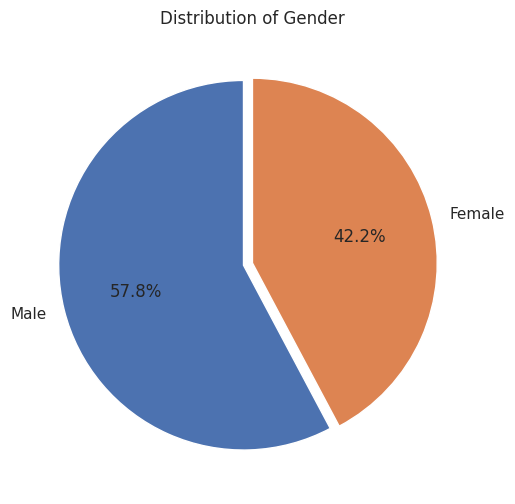

In [73]:
gender_count = df['Gender'].value_counts()

# create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%', startangle=90, explode=[0.05,0])
plt.title('Distribution of Gender')
plt.show()

There are 57.8% males and 42.2% females in dataframe.

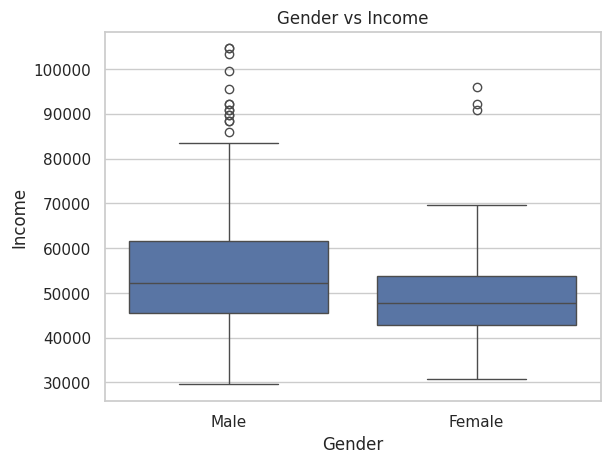

In [115]:
sns.boxplot(x="Gender",y="Income",data=df)
plt.title("Gender vs Income")
plt.show()

Male's income has high median compared to Female.After visulization analyzed that males earn more money compared to Females.

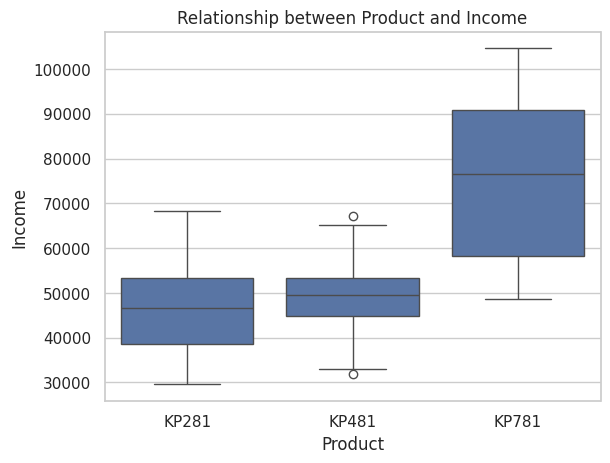

In [116]:
sns.boxplot(x="Product",y="Income",data=df)
plt.title("Relationship between Product and Income")
plt.show()

People those having high income they only bought KP781 product.




less income people are buying KP281.





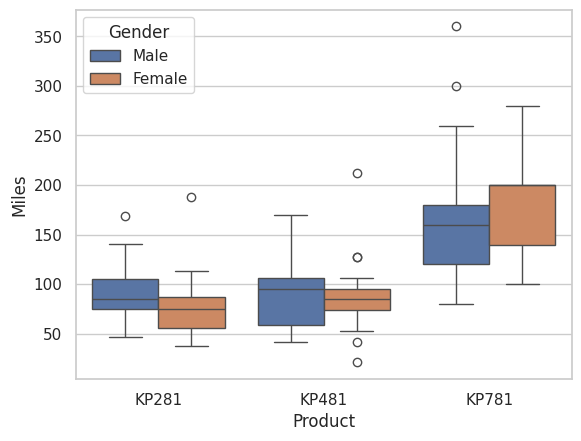

In [117]:
sns.boxplot(x="Product",y="Miles",hue="Gender",data=df)
plt.show()

Those people who are running more they bought KP781.

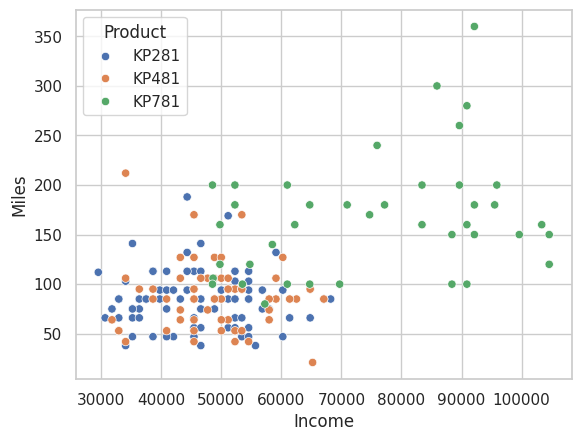

In [118]:
sns.scatterplot(x="Income",y="Miles",data=df,hue="Product")
plt.show()

Those people having high income and running more .They generally buy KP781.
High income people can buy KP781 because cost of KP781 is high.

<Axes: xlabel='Fitness', ylabel='Income'>

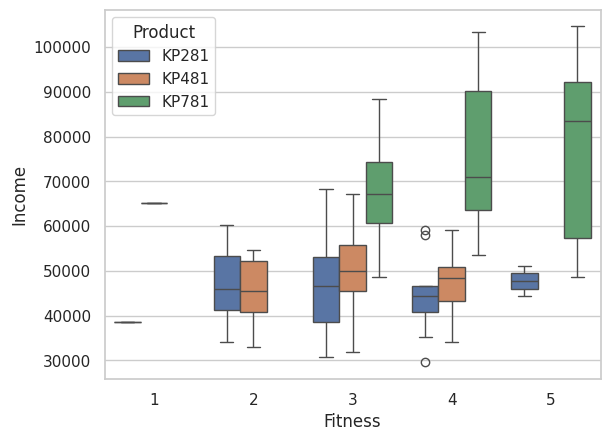

In [78]:
sns.boxplot(x="Fitness",y="Income",hue="Product",data=df)

People having good fitness level and higher income potential they are buying KP781.

In [79]:
df["Product"].value_counts(normalize=True)*100

Product
KP281    44.444444
KP481    33.333333
KP781    22.222222
Name: proportion, dtype: float64

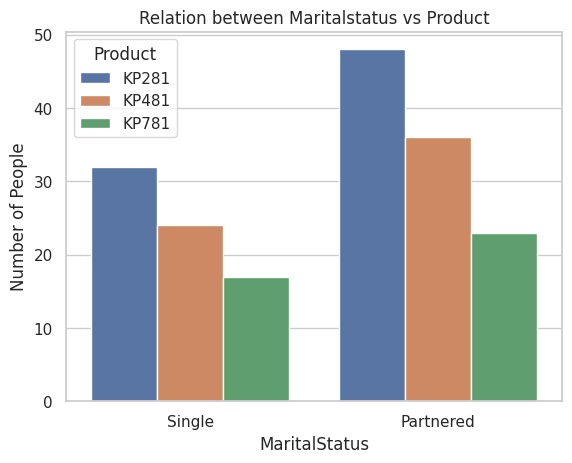

In [94]:
sns.countplot(x="MaritalStatus",hue="Product",data=df)
plt.title("Relation between Maritalstatus vs Product")
plt.xlabel("MaritalStatus")
plt.ylabel("Number of People" )
plt.show()


Married people are buying more product compared to single.

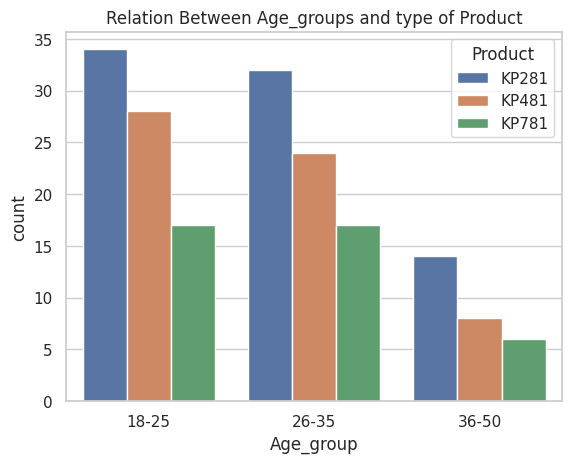

In [84]:
sns.countplot(x='Age_group', hue='Product', data=df)
plt.title("Relation Between Age_groups and type of Product")
plt.show()

More people is in age_group between 18-25 comapre to 36-35.

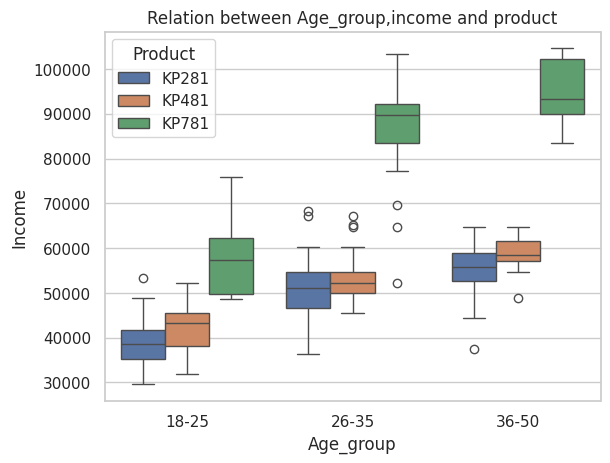

In [95]:
sns.boxplot(x="Age_group",y="Income",hue="Product",data=df)
plt.title("Relation between Age_group,income and product")
plt.show()

according to visulization in any group those people having high income they buy KP781.Age_group between 36_50  people earn high income.

"Representing the Probability"






Find the marginal probability (what percent of customers have purchased
KP281, KP481, or KP781)

In [ ]:
#Category  to Category analysis we will prefer crosstab to analysis the marginal probability

In [97]:
pd.crosstab(index=df["Gender"],columns=df["Product"])

Product,KP281,KP481,KP781
Gender,,,
Female,40,29,7
Male,40,31,33


In [100]:
pd.crosstab(index=df["Gender"],columns=df["Product"],margins=True)

Product,KP281,KP481,KP781,All
Gender,,,,
Female,40,29,7,76
Male,40,31,33,104
All,80,60,40,180


In [103]:
pd.crosstab(index=df["Gender"],columns=df["Product"],margins=True,normalize=True)*100

Product,KP281,KP481,KP781,All
Gender,,,,
Female,22.222222,16.111111,3.888889,42.222222
Male,22.222222,17.222222,18.333333,57.777778
All,44.444444,33.333333,22.222222,100.000000


In [110]:
#finding the conditional probability of male and female buying the product
pd.crosstab(index=df["Gender"],columns=df["Product"],margins=True,normalize="index")

Product,KP281,KP481,KP781
Gender,,,
Female,0.526316,0.381579,0.092105
Male,0.384615,0.298077,0.317308
All,0.444444,0.333333,0.222222


In [ ]:
#Find the conditional probability that an event occurs given that another event has occured
#out of 2000 females ,2000 males how many of them will buy KP781,KP481,KP281

In [109]:
pd.crosstab(index=df["Gender"],columns=df["Product"],margins=True,normalize="index")*2000

Product,KP281,KP481,KP781
Gender,,,
Female,1052.631579,763.157895,184.210526
Male,769.230769,596.153846,634.615385
All,888.888889,666.666667,444.444444


In [ ]:
#Out of 1000 KP481 Manufacter. how many will buy by female?

In [104]:
pd.crosstab(index=df["Gender"],columns=df["Product"],margins=True,normalize="columns")*1000 #conditional probability

Product,KP281,KP481,KP781,All
Gender,,,,
Female,500.0,483.333333,175.0,422.222222
Male,500.0,516.666667,825.0,577.777778


In [106]:
pd.crosstab(index=df["MaritalStatus"],columns=df["Product"],margins=True,normalize=True)*100 #marginal probability

Product,KP281,KP481,KP781,All
MaritalStatus,,,,
Partnered,26.666667,20.000000,12.777778,59.444444
Single,17.777778,13.333333,9.444444,40.555556
All,44.444444,33.333333,22.222222,100.000000


In [112]:
pd.crosstab(index=df["Age_group"],columns=df["Product"],margins=True,normalize=True)*100   #marginal probability

Product,KP281,KP481,KP781,All
Age_group,,,,
18-25,18.888889,15.555556,9.444444,43.888889
26-35,17.777778,13.333333,9.444444,40.555556
36-50,7.777778,4.444444,3.333333,15.555556
All,44.444444,33.333333,22.222222,100.000000


In [114]:
pd.crosstab(index=df["Age_group"],columns=df["Product"],margins=True,normalize="index")*100  #conditional probability

Product,KP281,KP481,KP781
Age_group,,,
18-25,43.037975,35.443038,21.518987
26-35,43.835616,32.876712,23.287671
36-50,50.000000,28.571429,21.428571
All,44.444444,33.333333,22.222222


# Based on the analysis of the customer data, here are my recommendations for Aerofit:

1] Promote the KP781 model in the high and medium income range  as they are more likely to buy it. The data shows that customers in the higher income brackets are more likely to purchase higher-end products. Therefore, Aerofit should focus on marketing and promoting the KP781 model to customers in these income ranges to increase sales.

2] Aerofit should also focus on marketing the products to married people, as they are more likely to buy the products than unmarried ones. This could be done by running targeted ads or creating campaigns that focus on the benefits of using Aerofit products for couples. Aerofit should also take into account the gender preferences for their products.

3] Females are more likely to buy the KP281 model than males, while the KP781 is preferred by males. This information could be used to develop targeted marketing campaigns for each model, highlighting the features that appeal most to each gender.